# Contents
- [Imports](#import)
- [Confusion Matrix](#conmat)
- [ROC curve](#ROC)
- [Precision-Recall curve](#prcurve)

---
# Imports<a id=import></a>

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from inspect import signature
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
cleaned_all=pd.read_csv(r'..\datasets\cleaned_all.csv')

---
# Confusion Matrix<a id=conmat></a>

Here, we will display the confusion matrix and classification report for out baseline and optimal models.

In [32]:
df=cleaned_all
cvec = CountVectorizer(stop_words='english',strip_accents='unicode')
X_train,X_test,y_train,y_test=train_test_split(df.stoptext,df.subreddit,random_state=42,stratify=df.subreddit)
X_train=pd.DataFrame(cvec.fit_transform(X_train).todense(),columns=cvec.get_feature_names())
X_test=pd.DataFrame(cvec.transform(X_test).todense(),columns=cvec.get_feature_names())    

In [33]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
base_pred=lr.predict(X_test)
baseline_conf=confusion_matrix(y_test,base_pred)
baseline_class=classification_report(y_test,base_pred,target_names=['askmath','AskPhysics'],output_dict=True)

E:\Users\chang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
print('Confusion matrix for the baseline model:')
display(pd.DataFrame(baseline_conf,index=['from askmath','from AskPhysics'],columns=['predicted askmath','predicted AskPhysics']))
print('\n Classification report for the baseline mode:')
display(pd.DataFrame(baseline_class))

Confusion matrix for the baseline model:


,predicted askmath,predicted AskPhysics
from askmath,231,19
from AskPhysics,45,203



 Classification report for the baseline mode:


,askmath,AskPhysics,micro avg,macro avg,weighted avg
f1-score,0.878327,0.863830,0.871486,0.871078,0.871108
precision,0.836957,0.914414,0.871486,0.875685,0.875530
recall,0.924000,0.818548,0.871486,0.871274,0.871486
support,250.000000,248.000000,498.000000,498.000000,498.000000


In [35]:
df=cleaned_all
tvec = TfidfVectorizer(stop_words='english',strip_accents='unicode')
X_train,X_test,y_train,y_test=train_test_split(df.stoptext,df.subreddit,random_state=42,stratify=df.subreddit)
X_train=pd.DataFrame(tvec.fit_transform(X_train).todense(),columns=tvec.get_feature_names())
X_test=pd.DataFrame(tvec.transform(X_test).todense(),columns=tvec.get_feature_names())    

In [36]:
mnb=MultinomialNB(alpha=1.60)
mnb.fit(X_train,y_train)
opt_pred=mnb.predict(X_test)
opt_conf=confusion_matrix(y_test,opt_pred)
opt_class=classification_report(y_test,opt_pred,target_names=['askmath','AskPhysics'],output_dict=True)

In [37]:
print('Confusion matrix for the optimal model:')
display(pd.DataFrame(opt_conf,index=['from askmath','from AskPhysics'],columns=['predicted askmath','predicted AskPhysics']))
print('\n Classification report for the optimal mode:')
display(pd.DataFrame(opt_class))

Confusion matrix for the optimal model:


,predicted askmath,predicted AskPhysics
from askmath,214,36
from AskPhysics,18,230



 Classification report for the optimal mode:


,askmath,AskPhysics,micro avg,macro avg,weighted avg
f1-score,0.887967,0.894942,0.891566,0.891454,0.891440
precision,0.922414,0.864662,0.891566,0.893538,0.893654
recall,0.856000,0.927419,0.891566,0.891710,0.891566
support,250.000000,248.000000,498.000000,498.000000,498.000000


Comparing the two confusion matrices, our optimal model has a better accuracy ($\frac{TP+TN}{TP+TN+FP+FN}$) as compared to our baseline model, classifying 10 more subreddit posts correctly.<br/>
We can observe, however, that our optimal model is worse at predicting 'askmath' posts as compared to the baseline, but better at predicting 'AskPhysics' posts.<br/>

This can also be seen in our classification report where for our optimal model, the recall (true positive rate) of our 'askmath' classification has dropped.<br/>
As there have also been more 'AskPhysics' prediction in our optimal model, our precision (predicted positive rate) has also dropped as compared to our baseline.<br/>
However, balancing both precision and recall scores, we observe that our f1-score has increased in general for our optimal model.

---
# ROC curve<a id=ROC></a>
We will plot the ROC curves of our baseline vs. our optimal models in the same plot below.

In [48]:
# Let's create a dataframe for our baseline called base_pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.
df=cleaned_all
cvec = CountVectorizer(stop_words='english',strip_accents='unicode')
X_train,X_test,y_train,y_test=train_test_split(df.stoptext,df.subreddit,random_state=42,stratify=df.subreddit)
X_train=pd.DataFrame(cvec.fit_transform(X_train).todense(),columns=cvec.get_feature_names())
X_test=pd.DataFrame(cvec.transform(X_test).todense(),columns=cvec.get_feature_names())  
lr=LogisticRegression()
lr.fit(X_train,y_train)

pred_proba = [i[1] for i in lr.predict_proba(X_test)]

base_pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

E:\Users\chang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
# do the same for our optimal model
df=cleaned_all
tvec = TfidfVectorizer(stop_words='english',strip_accents='unicode')
X_train,X_test,y_train,y_test=train_test_split(df.stoptext,df.subreddit,random_state=42,stratify=df.subreddit)
X_train=pd.DataFrame(tvec.fit_transform(X_train).todense(),columns=tvec.get_feature_names())
X_test=pd.DataFrame(tvec.transform(X_test).todense(),columns=tvec.get_feature_names())    
mnb=MultinomialNB(alpha=1.60)
mnb.fit(X_train,y_train)

pred_proba = [i[1] for i in mnb.predict_proba(X_test)]

opt_pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

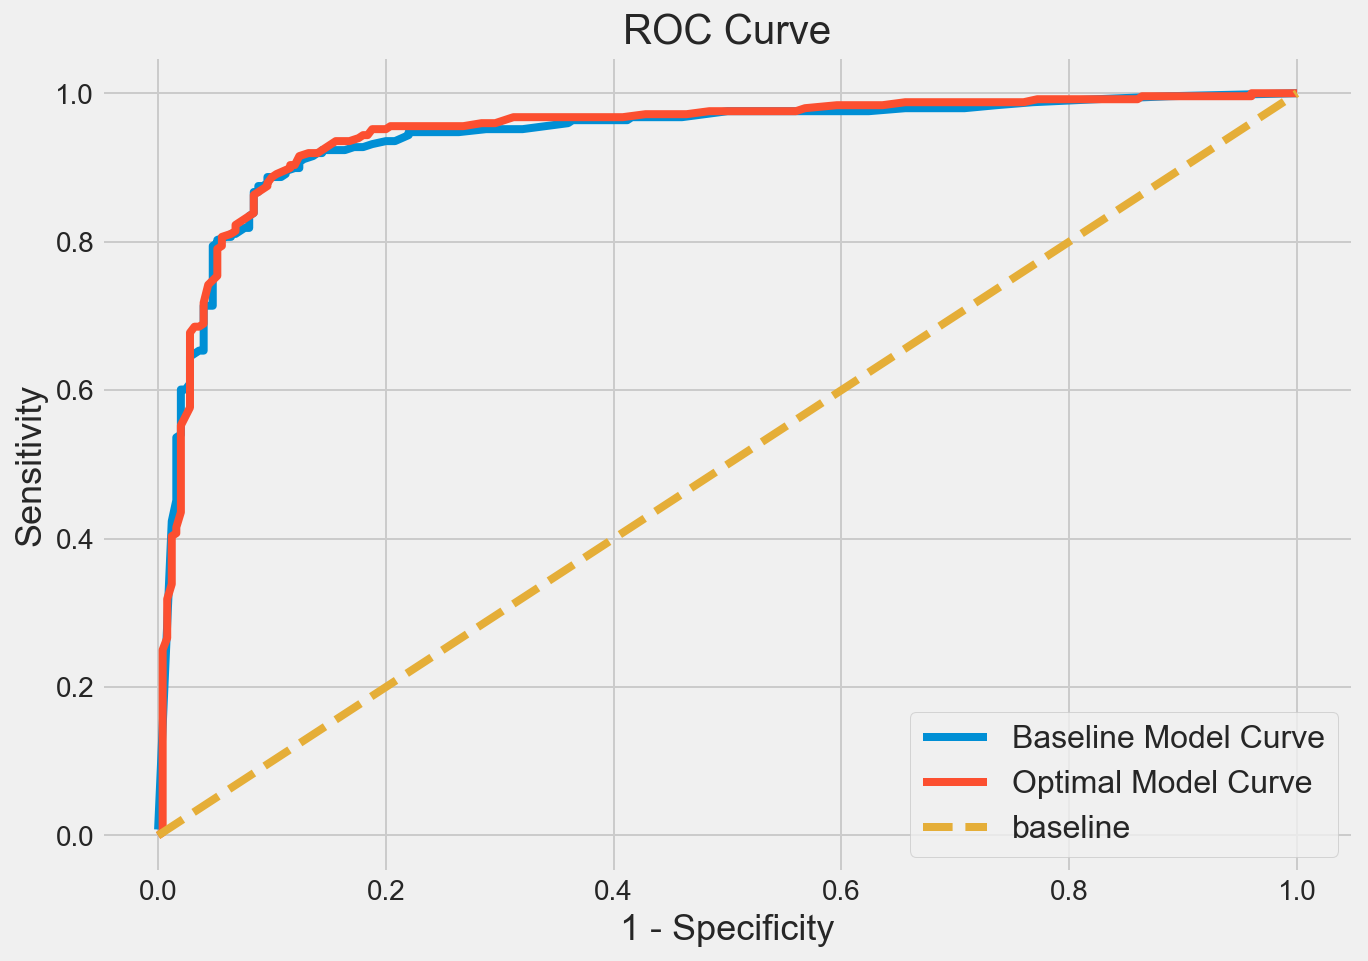

In [58]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(base_pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(base_pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot baseline ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='Baseline Model Curve')

# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(opt_pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(opt_pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot optimal ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='Optimal Model Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve')
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

We can observe through our ROC curve that any improvement our optimal model makes to our baseline model is negligible.<br/>
Graphically speaking, any changes to our true and false positive rates are insignificant.

---
# Precision-Recall Curve<a id=prcurve></a>
In this section, we plot the precision-recall curves for both our models.

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.93')

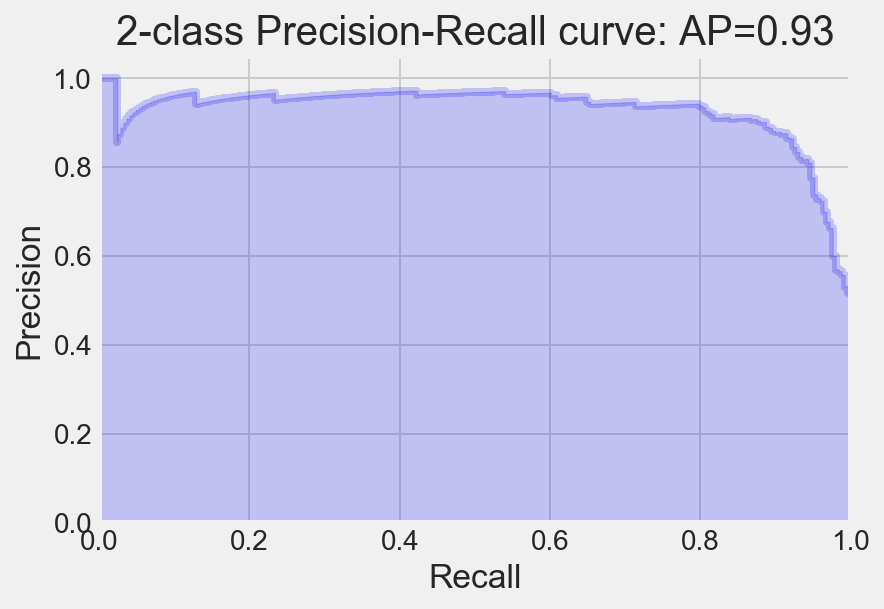

In [65]:
# Compute precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, base_pred_df['pred_probs'])
# Compute the average precision score
average_precision = average_precision_score(y_test, base_pred_df['pred_probs'])

# Create our plot
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.93')

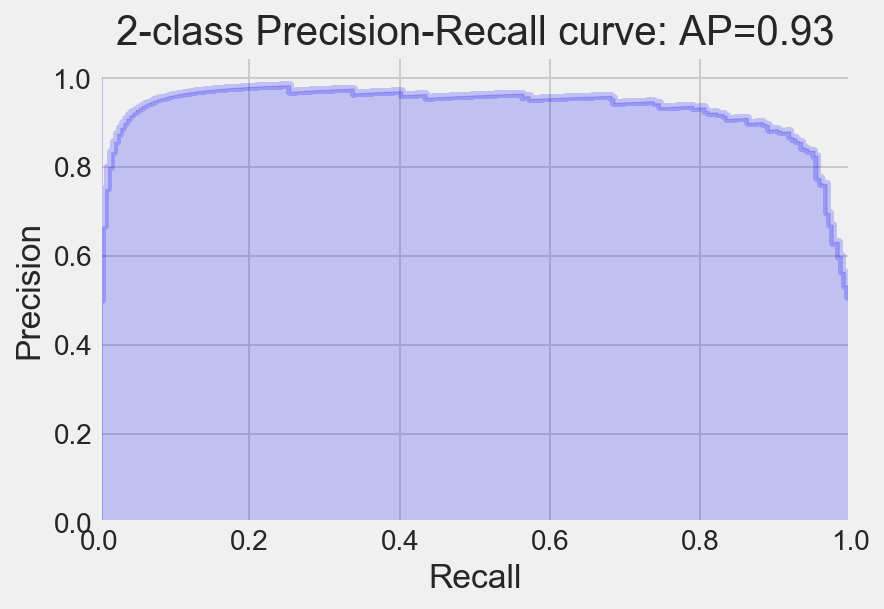

In [64]:
# Compute precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, opt_pred_df['pred_probs'])
# Compute the average precision score
average_precision = average_precision_score(y_test, opt_pred_df['pred_probs'])

# Create our plot
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

We observe that our precision-recall curves for both models are similar in shape and any changes are negligible; their average precision scores are mostly equal as well.<br/>
As such, while our classification has improved in the optimal model (10 more correct classifications in a set of 498 posts), most of the changes we perform to our model only provide very slight improvements to our classification.<br/>
It seems that other than tweaking model-types and classifiers, the most important aspect of such an NLP classification project is the data we use.<br/>
In future investigations, we can try working with an even larger dataset to observe if it provides better training for our classifier.